In [12]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [26]:
iris = sns.load_dataset('iris')

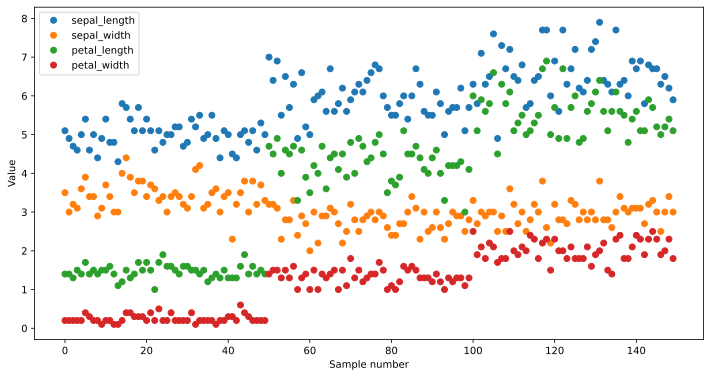

In [27]:
iris.plot(marker='o', linestyle='none', figsize=(12,6))
plt.xlabel('Sample number')
plt.ylabel('Value')
plt.show()

In [28]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype = torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [29]:
train_data, test_data, train_y, test_y = train_test_split(data, labels, test_size=.2)

train_dataset = TensorDataset(train_data, train_y)
test_dataset = TensorDataset(test_data, test_y)



In [30]:
def create_model():
    ANNiris = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3),
    )
    
    loss_fun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.0001)
    
    return ANNiris, loss_fun, optimizer

In [31]:
num_of_epochs = 1000

def train_model(model, loss_func, optimizer):
    train_acc = []
    test_acc = [] 
    losses = []
    
    for epoch in range(num_of_epochs):
        model.train()
        batch_acc = []
        batch_loss = []
        for X, y in train_loader:
            yHat = model(X)
            loss = loss_func(yHat, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batch_acc.append(100*torch.mean((torch.argmax(yHat, axis=1)==y).float()).item())
            batch_loss.append(loss.item())
            
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))
        
        model.eval()
        X,y = next(iter(test_loader))
        predlabels = torch.argmax(model(X), axis=1)
        test_acc.append(100*torch.mean((predlabels==y).float()).item())
    
    return train_acc, test_acc, losses

In [32]:
powers_of_two = [1, 2, 3, 4, 5, 6]
train_acc_on_batches = np.zeros((num_of_epochs, len(powers_of_two)))
test_acc_on_batches = np.zeros((num_of_epochs, len(powers_of_two)))


for idx, power in enumerate(powers_of_two):
    train_loader = DataLoader(train_dataset, batch_size=2**power, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0])

    ANNiris, loss_fun, optimizer = create_model()

    train_acc, test_acc, losses = train_model(ANNiris, loss_fun, optimizer)
    train_acc_on_batches[:, idx] = train_acc
    test_acc_on_batches[:, idx] = test_acc

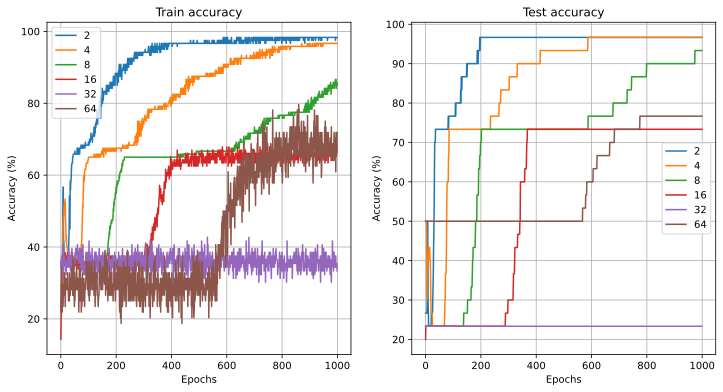

In [33]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].plot(train_acc_on_batches)
ax[0].set_title('Train accuracy')
ax[1].plot(test_acc_on_batches)
ax[1].set_title('Test accuracy')

leg_labels = [2**power_of_two for power_of_two in powers_of_two]

for i in range(2):
    ax[i].legend(leg_labels)
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy (%)')
    ax[i].grid()
    
plt.show()